In [1]:
from my_logistic_regression import MyLogisticRegression as MyLR
from data_spliter import data_spliter
from minmax import minmax
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Functions

In [2]:
def plot(X, x1, x2, y, y_hat, labels, colors=['b', 'c'], threshold=.5):
    try:
        plt.plot(X[np.where(y==1),x1],
                 X[np.where(y==1),x2],
                 'o', color=colors[0],
                 label="Origin")
        plt.plot(X[np.where(y_hat>threshold),x1],
                 X[np.where(y_hat>threshold),x2],
                 '.', color=colors[1],
                 label="Prediction")
        plt.xlabel(labels[x1])
        plt.ylabel(labels[x2])
        plt.show()
    except Exception as err:
        print(err)

# Data

In [3]:
areas = ['Flying cities of Venus',
         'United Nations of Earth',
         'Mars Republic',
         'The Asteroids’ Belt colonies']
zipcode = 2

In [4]:
x = pd.read_csv("../ressources/solar_system_census.csv")
x.head()

,Unnamed: 0,height,weight,bone_density
0,0,172.274151,86.970349,1.018098
1,1,198.977479,104.855553,0.697414
2,2,207.119681,87.401047,0.723361
3,3,184.642721,63.142295,0.547739
4,4,179.384814,67.523257,1.076022


In [5]:
y = pd.read_csv("../ressources/solar_system_census_planets.csv")
y.head()

,Unnamed: 0,Origin
0,0,1.0
1,1,2.0
2,2,3.0
3,3,3.0
4,4,0.0


In [6]:
y['Origin'][y['Origin'] == zipcode] = -1
y['Origin'][y['Origin'] > -1] = 0
y['Origin'][y['Origin'] == -1] = 1
y.head()

,Unnamed: 0,Origin
0,0,0.0
1,1,1.0
2,2,0.0
3,3,0.0
4,4,0.0


In [7]:
norm_x = x.copy()
#for col in x.columns[1:]:
#    norm_x[col] = minmax(x[col])
norm_x.head()

,Unnamed: 0,height,weight,bone_density
0,0,172.274151,86.970349,1.018098
1,1,198.977479,104.855553,0.697414
2,2,207.119681,87.401047,0.723361
3,3,184.642721,63.142295,0.547739
4,4,179.384814,67.523257,1.076022


In [8]:
norm_y = y.copy()
#norm_y['Origin'] = minmax(y['Origin'])
norm_y.head()

,Unnamed: 0,Origin
0,0,0.0
1,1,1.0
2,2,0.0
3,3,0.0
4,4,0.0


In [9]:
np_x = np.array(norm_x)
np_y = np.array(norm_y)

In [10]:
x_train, x_test, y_train, y_test = data_spliter(np_x, np_y, 0.8, True)
y_train = y_train
y_test = y_test
idx_train = x_train[:,1]
idx_test = x_test[:,1]
x_train = x_train[:,1:]
x_test = x_test[:,1:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((96, 3), (24, 3), (96, 1), (24, 1))

# Model training

In [11]:
alpha=0.001
max_iter=10000
theta = np.zeros(x_train.shape[1] + 1).reshape(-1, 1)

In [12]:
lm = MyLR(theta, alpha=alpha, max_iter=max_iter)
lm.fit_(x_train, y_train)
y_pred = lm.predict_(x_train)
mse = lm.loss_(x_train, y_train)

In [13]:
mse

2.323633215741395

In [14]:
lm.thetas

array([[-0.12783659],
       [-0.21151411],
       [ 0.33551126],
       [-0.1605872 ]])

In [27]:
true_negative = y_train[np.where((y_pred<.5) & (y_train==0))].size
true_positive = y_train[np.where((y_pred>.5) & (y_train==1))].size
true_pred = (true_positive + true_negative) / y_train.size
true_positive, true_negative, true_pred

(0, 69, 0.71875)

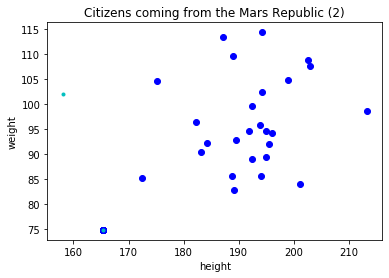

In [16]:
plt.title("Citizens coming from the {0} ({1})".format(areas[zipcode], zipcode))
plot(X=x_train, 
     x1=0, x2=1, 
     y=y_train, y_hat=y_pred, 
     labels=x.columns[1:], colors=['b', 'c'], threshold=.5)

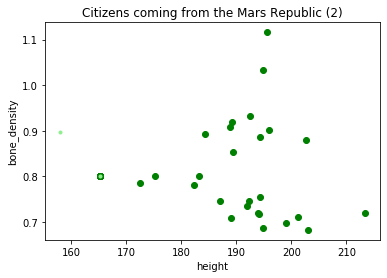

In [17]:
plt.title("Citizens coming from the {0} ({1})".format(areas[zipcode], zipcode))
plot(X=x_train, 
     x1=0, x2=2, 
     y=y_train, y_hat=y_pred, 
     labels=x.columns[1:], colors=['g', 'lightgreen'], threshold=.5)

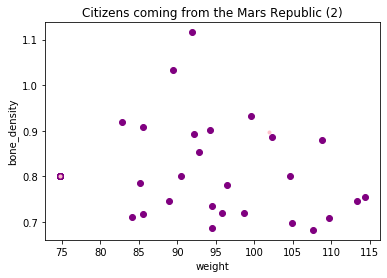

In [18]:
plt.title("Citizens coming from the {0} ({1})".format(areas[zipcode], zipcode))
plot(X=x_train, 
     x1=1, x2=2, 
     y=y_train, y_hat=y_pred, 
     labels=x.columns[1:], colors=['purple', 'pink'], threshold=.5)

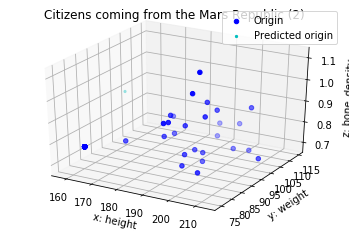

In [19]:
from mpl_toolkits.mplot3d import Axes3D

threshold = .5

x1 = x_train[np.where(y_train==1),0]
x2 = x_train[np.where(y_train==1),1]
x3 = x_train[np.where(y_train==1),2]

x1_hat = x_train[np.where(y_pred>threshold),0]
x2_hat = x_train[np.where(y_pred>threshold),1]
x3_hat = x_train[np.where(y_pred>threshold),2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, x3, marker='o', color='b', label='Origin')
ax.scatter(x1_hat, x2_hat, x3_hat, marker='.', color='c', label='Predicted origin')
ax.set_xlabel("x: {0}".format(x.columns[1]))
ax.set_ylabel("y: {0}".format(x.columns[2]))
ax.set_zlabel("z: {0}".format(x.columns[3]))
plt.title("Citizens coming from the {0} ({1})".format(areas[zipcode], zipcode))
plt.legend()
plt.show()

# Model testing

In [20]:
y_pred_test = lm.predict_(x_test)
mse = lm.loss_(x_test, y_test)
mse

1.936147944236145

In [29]:
true_negative = y_test[np.where((y_pred_test<.5) & (y_test==0))].size
true_positive = y_test[np.where((y_pred_test>.5) & (y_test==1))].size
true_pred = (true_positive + true_negative) / y_test.size
true_positive, true_negative, true_pred

(0, 20, 0.20833333333333334)

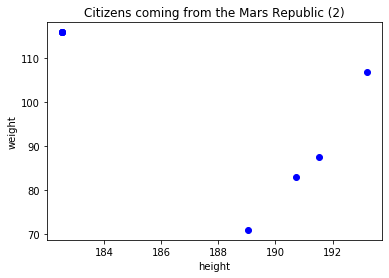

In [22]:
plt.title("Citizens coming from the {0} ({1})".format(areas[zipcode], zipcode))
plot(X=x_test, 
     x1=0, x2=1, 
     y=y_test, y_hat=y_pred_test, 
     labels=x.columns[1:], colors=['b', 'c'], threshold=.5)

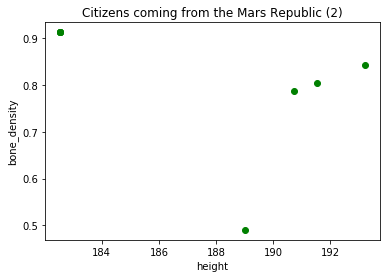

In [23]:
plt.title("Citizens coming from the {0} ({1})".format(areas[zipcode], zipcode))
plot(X=x_test, 
     x1=0, x2=2, 
     y=y_test, y_hat=y_pred_test, 
     labels=x.columns[1:], colors=['g', 'lightgreen'], threshold=.5)

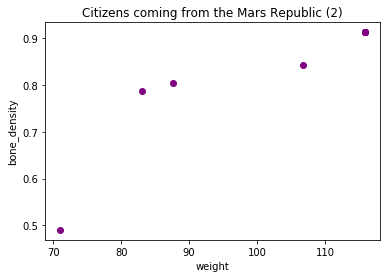

In [24]:
plt.title("Citizens coming from the {0} ({1})".format(areas[zipcode], zipcode))
plot(X=x_test, 
     x1=1, x2=2, 
     y=y_test, y_hat=y_pred_test, 
     labels=x.columns[1:], colors=['purple', 'pink'], threshold=.5)

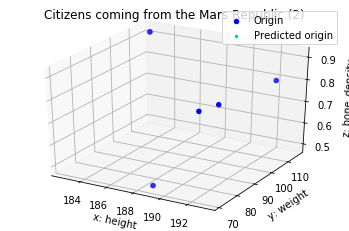

In [25]:
threshold = .5

x1 = x_test[np.where(y_test==1),0]
x2 = x_test[np.where(y_test==1),1]
x3 = x_test[np.where(y_test==1),2]

x1_hat = x_test[np.where(y_pred_test>threshold),0]
x2_hat = x_test[np.where(y_pred_test>threshold),1]
x3_hat = x_test[np.where(y_pred_test>threshold),2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, x3, marker='o', color='b', label='Origin')
ax.scatter(x1_hat, x2_hat, x3_hat, marker='.', color='c', label='Predicted origin')
ax.set_xlabel("x: {0}".format(x.columns[1]))
ax.set_ylabel("y: {0}".format(x.columns[2]))
ax.set_zlabel("z: {0}".format(x.columns[3]))
plt.title("Citizens coming from the {0} ({1})".format(areas[zipcode], zipcode))
plt.legend()
plt.show()